## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
data = pd.read_csv("data/revenue-data.csv")

In [5]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


## Data Processing

In [6]:
data['£35K+ Salary'] = np.where(data['Salary'] > 35000, True, False )

In [7]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,£35K+ Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49,True
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45,True
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41,True
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99,False
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23,False


In [8]:
data.describe()

,Age,SiteSpending,SiteTime,RecommendImpression,Salary
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,40.577000,930.079200,151.082320,4.77900,46823.858860
std,13.147507,1016.477186,85.842607,3.67119,22595.237921
min,19.000000,40.430000,5.110000,0.00000,12441.660000
25%,29.000000,219.912500,79.337500,2.00000,27678.380000
50%,39.000000,440.490000,153.525000,4.00000,46004.480000
75%,49.000000,1246.695000,219.645000,7.00000,60967.432500
max,82.000000,4392.220000,300.880000,17.00000,145225.720000


### Label Encoding

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Education"] = le.fit_transform(data['Education'])
data["WorkType"] = le.fit_transform(data["WorkType"])
data['Sex'] = le.fit_transform(data['Sex'])
data['Region'] =  le.fit_transform(data['Region'])
data['£35K+ Salary'] =  le.fit_transform(data['£35K+ Salary'])

In [10]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,£35K+ Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49,1
1,20,3758.36,149.36,4,2,0,0,7,42965.45,1
2,36,601.72,21.87,0,3,0,1,1,54924.41,1
3,21,44.89,182.80,9,3,0,0,5,26734.99,0
4,24,614.80,194.34,0,2,0,1,6,15325.23,0


### Feature Scaling

In [11]:
from sklearn import preprocessing
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data_scaled)

In [12]:
df.columns = data.columns

In [13]:
df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,£35K+ Salary
0,0.206349,0.062878,0.084627,0.000000,0.166667,0.0,1.0,0.181818,0.359470,1.0
1,0.015873,0.854345,0.487710,0.235294,0.333333,0.0,0.0,0.636364,0.229875,1.0
2,0.269841,0.128979,0.056666,0.000000,0.500000,0.0,1.0,0.090909,0.319939,1.0
3,0.031746,0.001025,0.600771,0.529412,0.500000,0.0,0.0,0.454545,0.107643,0.0
4,0.079365,0.131985,0.639788,0.000000,0.333333,0.0,1.0,0.545455,0.021716,0.0


### Defining Feature and Target variables

In [14]:
#feature variables
x = df.drop(['£35K+ Salary'], axis=1)
x = x.drop(['Salary'], axis=1)
x

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region
0,0.206349,0.062878,0.084627,0.000000,0.166667,0.000000,1.0,0.181818
1,0.015873,0.854345,0.487710,0.235294,0.333333,0.000000,0.0,0.636364
2,0.269841,0.128979,0.056666,0.000000,0.500000,0.000000,1.0,0.090909
3,0.031746,0.001025,0.600771,0.529412,0.500000,0.000000,0.0,0.454545
4,0.079365,0.131985,0.639788,0.000000,0.333333,0.000000,1.0,0.545455
...,...,...,...,...,...,...,...,...
995,0.587302,0.031536,0.905298,0.294118,0.333333,0.333333,0.0,0.363636
996,0.555556,0.026424,0.764310,0.294118,0.833333,0.000000,1.0,0.818182
997,0.047619,0.536715,0.953579,0.647059,0.833333,0.000000,1.0,0.636364
998,0.476190,0.991456,0.076647,0.000000,0.166667,0.000000,1.0,0.454545


In [15]:
#target variable
y = df['£35K+ Salary']
y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    1.0
998    1.0
999    1.0
Name: £35K+ Salary, Length: 1000, dtype: float64

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [100]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1152      
                                                                 
 dense_31 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [101]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=250, batch_size=100)

Epoch 1/250
8/8 [==============================] - 2s 238ms/step - loss: 0.6946 - accuracy: 0.5038 - val_loss: 0.6642 - val_accuracy: 0.6800
Epoch 2/250
8/8 [==============================] - 0s 8ms/step - loss: 0.6616 - accuracy: 0.6237 - val_loss: 0.6325 - val_accuracy: 0.6800
Epoch 3/250
8/8 [==============================] - 0s 6ms/step - loss: 0.6499 - accuracy: 0.6187 - val_loss: 0.6176 - val_accuracy: 0.6800
Epoch 4/250
8/8 [==============================] - 0s 6ms/step - loss: 0.6464 - accuracy: 0.6187 - val_loss: 0.6120 - val_accuracy: 0.6800
Epoch 5/250
8/8 [==============================] - 0s 6ms/step - loss: 0.6430 - accuracy: 0.6187 - val_loss: 0.6103 - val_accuracy: 0.6800
Epoch 6/250
8/8 [==============================] - 0s 6ms/step - loss: 0.6397 - accuracy: 0.6187 - val_loss: 0.6100 - val_accuracy: 0.6800
Epoch 7/250
8/8 [==============================] - 0s 8ms/step - loss: 0.6362 - accuracy: 0.6187 - val_loss: 0.6095 - val_accuracy: 0.6800
Epoch 8/250
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.4986 - accuracy: 0.7600 - val_loss: 0.5126 - val_accuracy: 0.7400
Epoch 60/250
8/8 [==============================] - 0s 5ms/step - loss: 0.4955 - accuracy: 0.7663 - val_loss: 0.5100 - val_accuracy: 0.7500
Epoch 61/250
8/8 [==============================] - 0s 8ms/step - loss: 0.4918 - accuracy: 0.7625 - val_loss: 0.5101 - val_accuracy: 0.7350
Epoch 62/250
8/8 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.7763 - val_loss: 0.5028 - val_accuracy: 0.7500
Epoch 63/250
8/8 [==============================] - 0s 6ms/step - loss: 0.4843 - accuracy: 0.7763 - val_loss: 0.4997 - val_accuracy: 0.7550
Epoch 64/250
8/8 [==============================] - 0s 6ms/step - loss: 0.4800 - accuracy: 0.7837 - val_loss: 0.5003 - val_accuracy: 0.7450
Epoch 65/250
8/8 [==============================] - 0s 5ms/step - loss: 0.4764 - accuracy: 0.7887 - val_loss: 0.4929 - val_accuracy: 0.7550
Epoch 66/250
8/8 [===============

8/8 [==============================] - 0s 6ms/step - loss: 0.3122 - accuracy: 0.8925 - val_loss: 0.3398 - val_accuracy: 0.8950
Epoch 118/250
8/8 [==============================] - 0s 6ms/step - loss: 0.3106 - accuracy: 0.8925 - val_loss: 0.3362 - val_accuracy: 0.8850
Epoch 119/250
8/8 [==============================] - 0s 7ms/step - loss: 0.3083 - accuracy: 0.8913 - val_loss: 0.3355 - val_accuracy: 0.8900
Epoch 120/250
8/8 [==============================] - 0s 7ms/step - loss: 0.3070 - accuracy: 0.8975 - val_loss: 0.3336 - val_accuracy: 0.8850
Epoch 121/250
8/8 [==============================] - 0s 9ms/step - loss: 0.3045 - accuracy: 0.8938 - val_loss: 0.3334 - val_accuracy: 0.9000
Epoch 122/250
8/8 [==============================] - 0s 7ms/step - loss: 0.3028 - accuracy: 0.8925 - val_loss: 0.3297 - val_accuracy: 0.9000
Epoch 123/250
8/8 [==============================] - 0s 8ms/step - loss: 0.3013 - accuracy: 0.8988 - val_loss: 0.3258 - val_accuracy: 0.8850
Epoch 124/250
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.2448 - accuracy: 0.9100 - val_loss: 0.2717 - val_accuracy: 0.9100
Epoch 176/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2450 - accuracy: 0.9112 - val_loss: 0.2734 - val_accuracy: 0.9150
Epoch 177/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2427 - accuracy: 0.9150 - val_loss: 0.2714 - val_accuracy: 0.9150
Epoch 178/250
8/8 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.9162 - val_loss: 0.2711 - val_accuracy: 0.9150
Epoch 179/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2415 - accuracy: 0.9162 - val_loss: 0.2702 - val_accuracy: 0.9150
Epoch 180/250
8/8 [==============================] - 0s 5ms/step - loss: 0.2419 - accuracy: 0.9125 - val_loss: 0.2695 - val_accuracy: 0.9150
Epoch 181/250
8/8 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.9150 - val_loss: 0.2701 - val_accuracy: 0.9100
Epoch 182/250
8/8 [========

8/8 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9212 - val_loss: 0.2537 - val_accuracy: 0.9100
Epoch 234/250
8/8 [==============================] - 0s 7ms/step - loss: 0.2181 - accuracy: 0.9212 - val_loss: 0.2514 - val_accuracy: 0.9100
Epoch 235/250
8/8 [==============================] - 0s 8ms/step - loss: 0.2163 - accuracy: 0.9237 - val_loss: 0.2553 - val_accuracy: 0.9200
Epoch 236/250
8/8 [==============================] - 0s 7ms/step - loss: 0.2166 - accuracy: 0.9250 - val_loss: 0.2548 - val_accuracy: 0.9200
Epoch 237/250
8/8 [==============================] - 0s 7ms/step - loss: 0.2160 - accuracy: 0.9212 - val_loss: 0.2488 - val_accuracy: 0.9100
Epoch 238/250
8/8 [==============================] - 0s 9ms/step - loss: 0.2152 - accuracy: 0.9187 - val_loss: 0.2519 - val_accuracy: 0.9100
Epoch 239/250
8/8 [==============================] - 0s 8ms/step - loss: 0.2146 - accuracy: 0.9162 - val_loss: 0.2526 - val_accuracy: 0.9150
Epoch 240/250
8/8 [========

[]

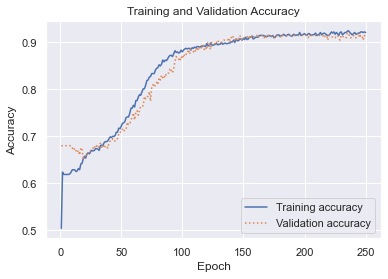

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

7/7 [==============================] - 0s 1ms/step


Text(89.133125, 0.5, 'Actual label')

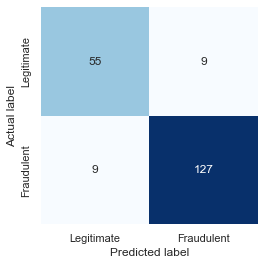

In [106]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [86]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [88]:
# build the model
num_classes = 10
input_dim = x_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', 
                input_dim = input_dim)) 
lr_model.add(Dropout(0.1))
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [93]:
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=8)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(2, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [104]:
%%time
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 250

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

Epoch 1/250
7/7 [==============================] - 1s 3ms/step - loss: 0.6554 - accuracy: 0.6012
Epoch 2/250
7/7 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6275
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6350
Epoch 4/250
7/7 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.6288
Epoch 5/250
7/7 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.6338
Epoch 6/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.6513
Epoch 7/250
7/7 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6538
Epoch 8/250
7/7 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.6625
Epoch 9/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.6737
Epoch 10/250
7/7 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.6725
Epoch 11/250
7/7 [===========

7/7 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.8863
Epoch 85/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8562
Epoch 86/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.8925
Epoch 87/250
7/7 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8750
Epoch 88/250
7/7 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8888
Epoch 89/250
7/7 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8687
Epoch 90/250
7/7 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8900
Epoch 91/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.8825
Epoch 92/250
7/7 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.8725
Epoch 93/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.8712
Epoch 94/250
7/7 [===============

7/7 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9050
Epoch 168/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9150
Epoch 169/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9050
Epoch 170/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9100
Epoch 171/250
7/7 [==============================] - 0s 4ms/step - loss: 0.2252 - accuracy: 0.9100
Epoch 172/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9025
Epoch 173/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9112
Epoch 174/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2441 - accuracy: 0.8913
Epoch 175/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.8975
Epoch 176/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9050
Epoch 177/250
7/7 [=====

7/7 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9237
Epoch 250/250
7/7 [==============================] - 0s 5ms/step - loss: 0.1801 - accuracy: 0.9200
CPU times: total: 10.9 s
Wall time: 34.5 s


In [105]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8775027394294739 using {'init_mode': 'he_normal'}
 mean=0.8575, std=0.01247 using {'init_mode': 'uniform'}
 mean=0.8663, std=0.01827 using {'init_mode': 'lecun_uniform'}
 mean=0.8763, std=0.005091 using {'init_mode': 'normal'}
 mean=0.6187, std=0.02326 using {'init_mode': 'zero'}
 mean=0.875, std=0.01722 using {'init_mode': 'glorot_normal'}
 mean=0.87, std=0.01667 using {'init_mode': 'glorot_uniform'}
 mean=0.8775, std=0.00343 using {'init_mode': 'he_normal'}
 mean=0.8512, std=0.001912 using {'init_mode': 'he_uniform'}
